In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales VMD.csv'

# Carga el archivo CSV en un DataFrame
df_Totales_VMD = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Totales_VMD.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales VMD.csv:
    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023


In [3]:
# Paso 1: Ver la estructura del DataFrame
print("Estructura del DataFrame (info):")
df_Totales_VMD.info()

# Paso 2: Verificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df_Totales_VMD.isnull().sum())

# Paso 3: Verificar valores negativos (si corresponde)
# Filtramos las columnas numéricas para revisar valores negativos
print("\nValores negativos en columnas numéricas:")
for col in df_Totales_VMD.select_dtypes(include=['float64', 'int64']).columns:
    negativos = df_Totales_VMD[df_Totales_VMD[col] < 0]
    print(f"{col}: {len(negativos)} valores negativos")
    if len(negativos) > 0:
        print(negativos.head())  # Muestra los primeros valores negativos encontrados



Estructura del DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB

Número de valores nulos por columna:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Valores negativos en columnas numéricas:
Año: 0 valores negativos
Trimestre: 0 valores negativos
Mbps (Media de bajada): 0 valores negativos


In [5]:
# 1. Convertir 'Año' a tipo fecha (aunque solo contiene el año, lo transformamos para facilitar su manipulación)
df_Totales_VMD['Año'] = pd.to_datetime(df_Totales_VMD['Año'], format='%Y').dt.year

# 2. Convertir 'Trimestre' a tipo periodo trimestral
df_Totales_VMD['Trimestre'] = pd.PeriodIndex(year=df_Totales_VMD['Año'], quarter=df_Totales_VMD['Trimestre'], freq='Q')

# 3. Filtrar datos entre 2018 y 2024
df_Totales_VMD = df_Totales_VMD[(df_Totales_VMD['Año'] >= 2018) & (df_Totales_VMD['Año'] <= 2024)]

# Ver el DataFrame después de las transformaciones
print(df_Totales_VMD.head())

    Año Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024    2024Q2                  139.25   Abr-Jun 2024
1  2024    2024Q1                  139.15   Ene-Mar 2024
2  2023    2023Q4                  139.04   Oct-Dic 2023
3  2023    2023Q3                  129.67  Jul-Sept 2023
4  2023    2023Q2                  123.95   Abr-Jun 2023


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3736\2589641319.py:5: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  df_Totales_VMD['Trimestre'] = pd.PeriodIndex(year=df_Totales_VMD['Año'], quarter=df_Totales_VMD['Trimestre'], freq='Q')


In [6]:
# Paso 1: Inspección general del DataFrame
# Información general sobre el DataFrame: número de registros, tipos de datos, valores nulos
print("Estructura del DataFrame (info):")
df_Totales_VMD.info()

# Verificar valores nulos en cada columna
print("\nNúmero de valores nulos por columna:")
print(df_Totales_VMD.isnull().sum())

# Ver las primeras 5 filas para inspeccionar los datos
print("\nPrimeras 5 filas del DataFrame:")
print(df_Totales_VMD.head())


Estructura del DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype        
---  ------                  --------------  -----        
 0   Año                     26 non-null     int32        
 1   Trimestre               26 non-null     period[Q-DEC]
 2   Mbps (Media de bajada)  26 non-null     float64      
 3   Trimestre.1             26 non-null     object       
dtypes: float64(1), int32(1), object(1), period[Q-DEC](1)
memory usage: 936.0+ bytes

Número de valores nulos por columna:
Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

Primeras 5 filas del DataFrame:
    Año Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024    2024Q2                  139.25   Abr-Jun 2024
1  2024    2024Q1                  139.15   Ene-Mar 2024
2  2023    2023Q4                  139.04   Oct-Dic 2023
3  2023

In [7]:
# Paso 2: Estadísticas descriptivas
# Obtiene un resumen estadístico de las columnas numéricas
print("\nResumen estadístico (describe):")
print(df_Totales_VMD.describe())



Resumen estadístico (describe):
               Año  Mbps (Media de bajada)
count    26.000000               26.000000
mean   2020.769231               60.041188
std       1.924738               44.164364
min    2018.000000               13.221340
25%    2019.000000               25.200000
50%    2021.000000               44.370000
75%    2022.000000               95.535000
max    2024.000000              139.250000


In [8]:
# Paso 3: Verificar valores negativos en columnas numéricas
print("\nValores negativos en columnas numéricas:")
for col in df_Totales_VMD.select_dtypes(include=['float64', 'int64']).columns:
    negativos = df_Totales_VMD[df_Totales_VMD[col] < 0]
    print(f"{col}: {len(negativos)} valores negativos")
    if len(negativos) > 0:
        print(negativos.head())  # Muestra los primeros valores negativos encontrados



Valores negativos en columnas numéricas:
Mbps (Media de bajada): 0 valores negativos


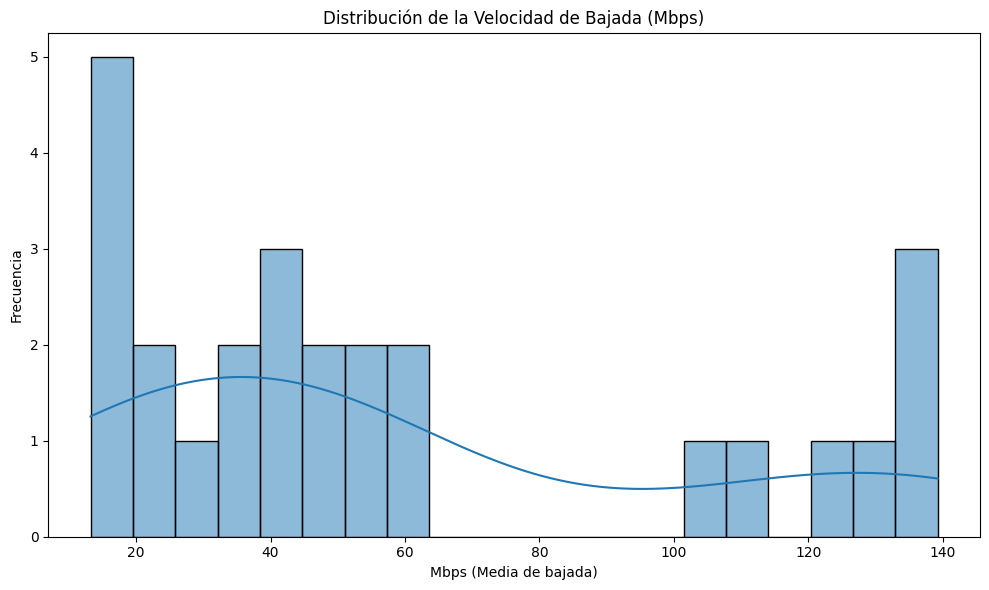

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 4: Distribución de la variable 'Mbps (Media de bajada)'
plt.figure(figsize=(10, 6))
sns.histplot(df_Totales_VMD['Mbps (Media de bajada)'], kde=True, bins=20)
plt.title("Distribución de la Velocidad de Bajada (Mbps)")
plt.xlabel("Mbps (Media de bajada)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [10]:
# Paso 1: Valores únicos en la columna 'Año'
print("Valores únicos en 'Año':")
print(df_Totales_VMD['Año'].unique())  # Muestra los valores únicos de la columna 'Año'

print("\nNúmero de valores únicos en 'Año':")
print(df_Totales_VMD['Año'].nunique())  # Muestra cuántos valores únicos hay en 'Año'


Valores únicos en 'Año':
[2024 2023 2022 2021 2020 2019 2018]

Número de valores únicos en 'Año':
7


In [11]:
# Paso 2: Valores únicos en la columna 'Trimestre'
print("Valores únicos en 'Trimestre':")
print(df_Totales_VMD['Trimestre'].unique())  # Muestra los valores únicos de la columna 'Trimestre'

print("\nNúmero de valores únicos en 'Trimestre':")
print(df_Totales_VMD['Trimestre'].nunique())  # Muestra cuántos valores únicos hay en 'Trimestre'


Valores únicos en 'Trimestre':
<PeriodArray>
['2024Q2', '2024Q1', '2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4',
 '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1',
 '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2',
 '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1']
Length: 26, dtype: period[Q-DEC]

Número de valores únicos en 'Trimestre':
26


In [12]:
# Paso 3: Valores únicos en la columna 'Trimestre.1'
print("Valores únicos en 'Trimestre.1':")
print(df_Totales_VMD['Trimestre.1'].unique())  # Muestra los valores únicos de la columna 'Trimestre.1'

print("\nNúmero de valores únicos en 'Trimestre.1':")
print(df_Totales_VMD['Trimestre.1'].nunique())  # Muestra cuántos valores únicos hay en 'Trimestre.1'



Valores únicos en 'Trimestre.1':
['Abr-Jun 2024' 'Ene-Mar 2024' 'Oct-Dic 2023' 'Jul-Sept 2023'
 'Abr-Jun 2023' 'Ene-Mar 2023' 'Oct-Dic 2022' 'Jul-Sept 2022'
 'Abr-Jun 2022' 'Ene-Mar 2022' 'Oct-Dic 2021' 'Jul-Sept 2021'
 'Abr-Jun 2021' 'Ene-Mar 2021' 'Oct-Dic 2020' 'Jul-Sept 2020'
 'Abr-Jun 2020' 'Ene-Mar 2020' 'Oct-Dic 2019' 'Jul-Sept 2019'
 'Abr-Jun 2019' 'Ene-Mar 2019' 'Oct-Dic 2018' 'Jul-Sept 2018'
 'Abr-Jun 2018' 'Ene-Mar 2018']

Número de valores únicos en 'Trimestre.1':
26


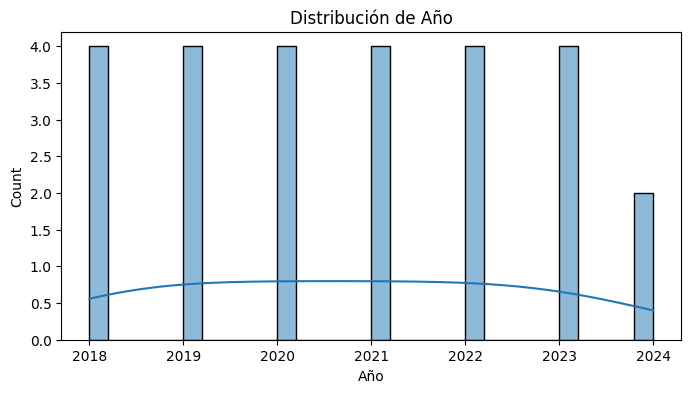

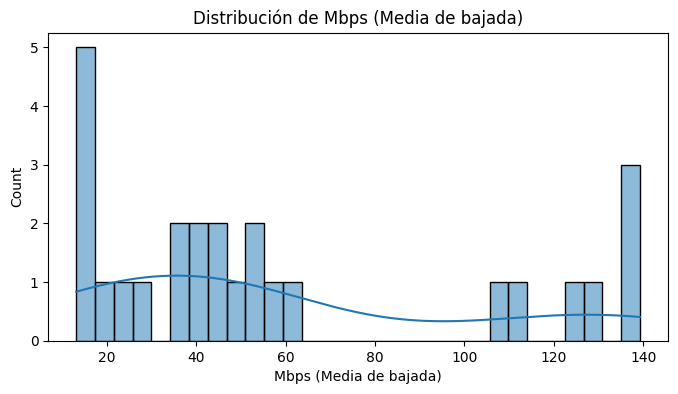

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de una columna numérica (ajusta según tu DataFrame)
for col in df_Totales_VMD.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_Totales_VMD[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()


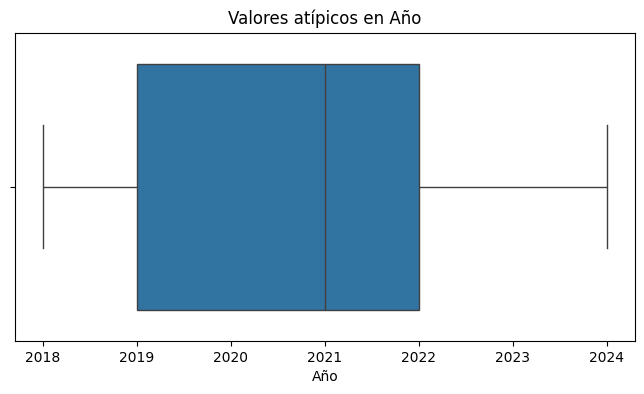

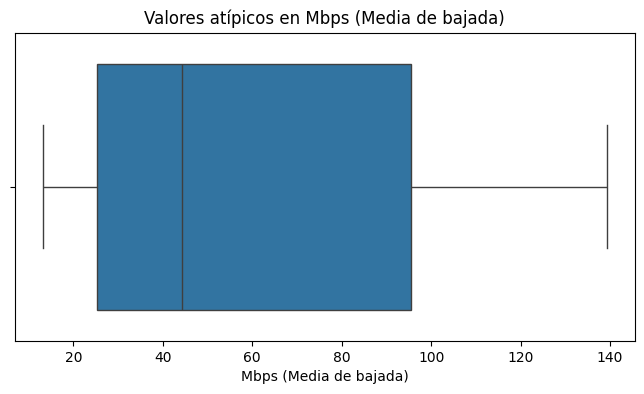

In [14]:
for col in df_Totales_VMD.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_Totales_VMD, x=col)
    plt.title(f'Valores atípicos en {col}')
    plt.show()


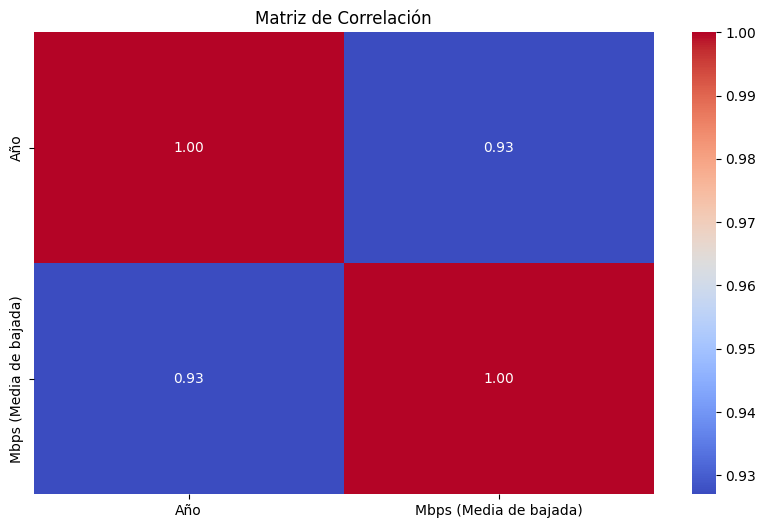

In [15]:
# Seleccionar solo columnas numéricas
df_corr = df_Totales_VMD.select_dtypes(include=['number'])

# Verificar si el DataFrame de correlaciones no está vacío
if df_corr.empty:
    print("No hay columnas numéricas para calcular la matriz de correlación.")
else:
    # Crear el mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Matriz de Correlación')
    plt.show()


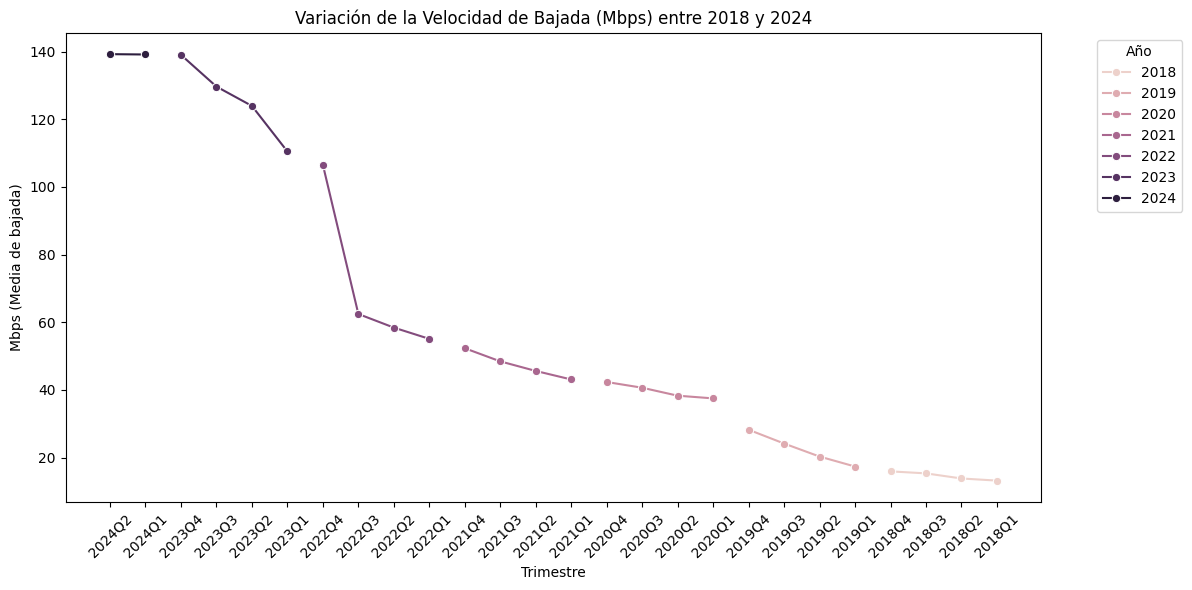

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Filtrar datos entre 2018 y 2024
df_filtrado = df_Totales_VMD[(df_Totales_VMD['Año'] >= 2018) & (df_Totales_VMD['Año'] <= 2024)]

# Asegurarse de que 'Trimestre' esté en formato de cadena
df_filtrado['Trimestre'] = df_filtrado['Trimestre'].astype(str)

# Paso 2: Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Usamos un gráfico de líneas para visualizar cómo ha variado la velocidad de bajada en el tiempo
sns.lineplot(data=df_filtrado, x="Trimestre", y="Mbps (Media de bajada)", hue="Año", marker='o')

# Configurar el gráfico
plt.title("Variación de la Velocidad de Bajada (Mbps) entre 2018 y 2024")
plt.xlabel("Trimestre")
plt.ylabel("Mbps (Media de bajada)")
plt.xticks(rotation=45)
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [18]:
# Sobrescribir el archivo original con las transformaciones realizadas
df_Totales_VMD.to_csv(archivo_csv, index=False)

print(f"Las transformaciones se han guardado en el archivo original: {archivo_csv}")


Las transformaciones se han guardado en el archivo original: C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales VMD.csv
